In [ ]:
import pandas as pd
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 10.4 MB/s eta 0:00:00


In [ ]:
import neattext.functions as nfx

In [ ]:
df = pd.read_csv("emotion_dataset_raw.csv")

In [ ]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [ ]:
df.shape

(34792, 2)

In [ ]:
df.dtypes

Emotion    object
Text       object
dtype: object

In [ ]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [ ]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<Axes: >

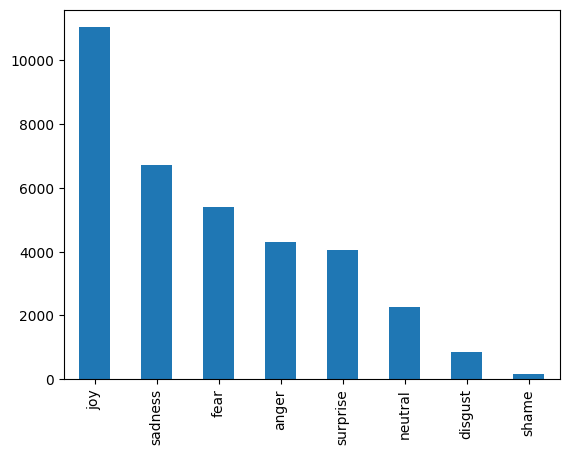

In [ ]:
df['Emotion'].value_counts().plot(kind='bar')

In [ ]:
# sns.countplot(df['Emotion'])

ValueError: ignored

<Axes: xlabel='Emotion', ylabel='count'>

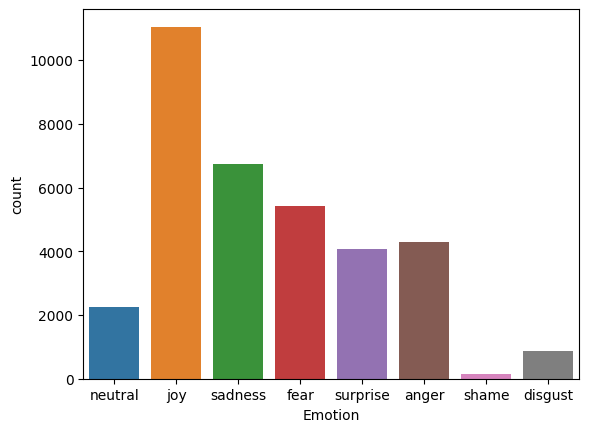

In [ ]:
sns.countplot(x='Emotion', data=df)

**Exploration**



*   Sentiment Analysis
*   Keyword Extraction
*   Keyword for each emotion
*   Wordcloud


In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Sentiment Analysis
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "Positive"
    elif sentiment == 0:
        result = "Neutral"
    else:
        result = "Negative"
    return result

In [ ]:
get_sentiment("I love coding")

'Positive'

In [ ]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [ ]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [ ]:
df.groupby(['Emotion', 'Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

<Axes: xlabel='Emotion,Sentiment'>

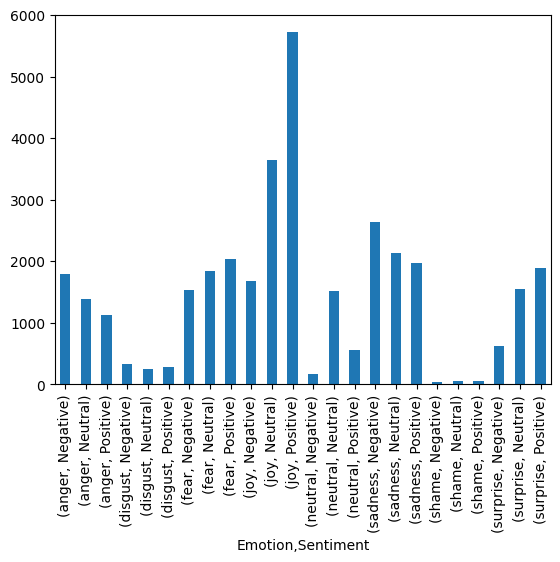

In [ ]:
df.groupby(['Emotion', 'Sentiment']).size().plot(kind='bar')

In [ ]:
# sns.factorplot
sns.catplot

<function seaborn.categorical.catplot(data=None, *, x=None, y=None, hue=None, row=None, col=None, col_wrap=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, height=5, aspect=1, kind='strip', native_scale=False, formatter=None, orient=None, color=None, palette=None, hue_norm=None, legend='auto', legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, ci='deprecated', **kwargs)>

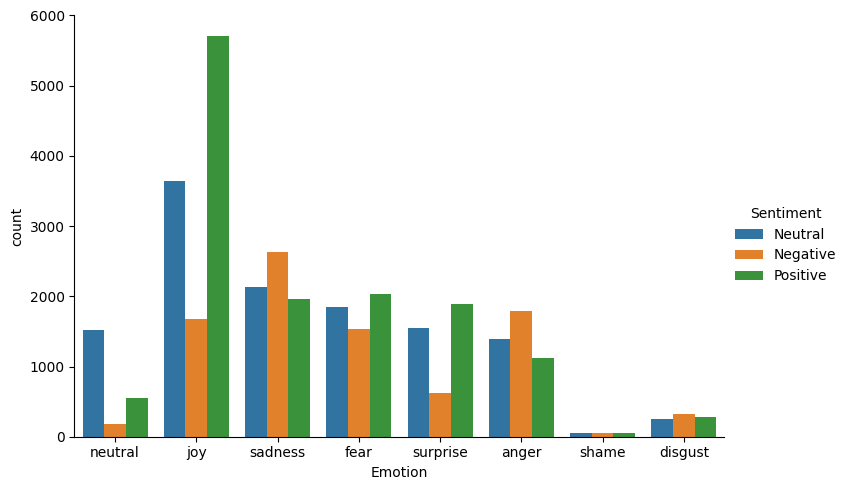

In [ ]:
 sns.catplot(x='Emotion', hue='Sentiment',data=df, kind='count', aspect=1.5)

### Text Cleaning

+ Remove Noise
    - stopwords
    - special characters
    - puncuations
    - emojis
    

In [ ]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)

In [ ]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [ ]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_punctuations)

In [ ]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,Why ?,Why
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,Such an eye ! The true hazel eye-and so brill...,Such an eye The true hazel eyeand so brillia...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,@Iluvmiasantos ugh babe hugggzzz for u babe ...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,@MichelGW have you gift Hope you like it Its h...
34788,The world didnt give it to me..so the world MO...,The world didnt give it to meso the world MOST...
34789,A man robbed me today .,A man robbed me today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu call it JEALOUSY I call it of #Losing YOU


### Keyword Extraction
+ Extract most common words per class of emotion

In [ ]:
from collections import Counter

In [ ]:
def extract_keywords(text, num=50):
  tokens = [tok for tok in text.split()]
  print(tokens)
  most_common_tokens = Counter(tokens).most_common(num)
  return dict(most_common_tokens)


In [ ]:
emotion_list = df['Emotion'].unique().tolist()
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [ ]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text'].tolist()

In [ ]:
joy_docx = ''.join(joy_list)

In [ ]:
joy_docx

'Sage Act upgrade on my to do list for tommorow Such an eye  The true hazel eyeand so brilliant  Regular features  open countenance  with a complexion  Oh  What a bloom of full health  and such a pretty height and size  such a firm and upright figure  There is health  not merely in her bloom  but in her air  her head  her glance  One hears sometimes of a child being  the picture of health   now  she always gives me the idea of being the complete picture of grownup health  She is loveliness itself  @Iluvmiasantos ugh babe hugggzzz for u   babe naamazed nga ako e babe e despite negas mas pinaramdam at fil ko ang For once in his life  Leopold must have been truly happy : his hopes and prayers for his beloved son seemed at last to have come to fruition  I have a feeling i will fail french #fuckfrench GoodLet  s go now  When I fell in love with \\X\\  Overnight I felt confidence selfesteem    responsible and worthwhileOne could get terribly ecstatic but that would be a dangerous thing to do

In [ ]:
#Extract keywords
keyword_joy = extract_keywords(joy_docx)

['Sage', 'Act', 'upgrade', 'on', 'my', 'to', 'do', 'list', 'for', 'tommorow', 'Such', 'an', 'eye', 'The', 'true', 'hazel', 'eyeand', 'so', 'brilliant', 'Regular', 'features', 'open', 'countenance', 'with', 'a', 'complexion', 'Oh', 'What', 'a', 'bloom', 'of', 'full', 'health', 'and', 'such', 'a', 'pretty', 'height', 'and', 'size', 'such', 'a', 'firm', 'and', 'upright', 'figure', 'There', 'is', 'health', 'not', 'merely', 'in', 'her', 'bloom', 'but', 'in', 'her', 'air', 'her', 'head', 'her', 'glance', 'One', 'hears', 'sometimes', 'of', 'a', 'child', 'being', 'the', 'picture', 'of', 'health', 'now', 'she', 'always', 'gives', 'me', 'the', 'idea', 'of', 'being', 'the', 'complete', 'picture', 'of', 'grownup', 'health', 'She', 'is', 'loveliness', 'itself', '@Iluvmiasantos', 'ugh', 'babe', 'hugggzzz', 'for', 'u', 'babe', 'naamazed', 'nga', 'ako', 'e', 'babe', 'e', 'despite', 'negas', 'mas', 'pinaramdam', 'at', 'fil', 'ko', 'ang', 'For', 'once', 'in', 'his', 'life', 'Leopold', 'must', 'have', 'b

In [ ]:
keyword_joy

{'the': 5292,
 'to': 4741,
 'I': 4212,
 'a': 3591,
 'and': 3216,
 'of': 2802,
 'my': 2784,
 'in': 2327,
 'for': 1994,
 'is': 1581,
 'with': 1372,
 'you': 1271,
 'that': 1229,
 'was': 1154,
 'at': 1124,
 'on': 1117,
 'me': 1091,
 'it': 986,
 'have': 959,
 'be': 890,
 'this': 778,
 'day': 722,
 'amp': 676,
 'up': 653,
 'had': 638,
 'all': 630,
 'so': 595,
 'time': 566,
 'when': 541,
 'your': 528,
 'Im': 525,
 'work': 505,
 'from': 479,
 'get': 478,
 'not': 477,
 'like': 476,
 'an': 473,
 'tomorrow': 459,
 'out': 451,
 'about': 450,
 'today': 446,
 'just': 443,
 'are': 437,
 'now': 431,
 'Christmas': 431,
 'The': 414,
 'but': 402,
 'do': 385,
 'as': 384,
 'love': 382}

In [ ]:
## Plot
def plot_most_common_words(mydict, emotion_name):
  df_01 = pd.DataFrame(mydict.items(), columns=['token', 'count'])
  plt.figure(figsize=(20,10))
  plt.title("Plot of {} Most Common Keywords".format(emotion_name))
  sns.barplot(x='token', y='count', data=df_01)
  plt.xticks(rotation=45)
  plt.show()

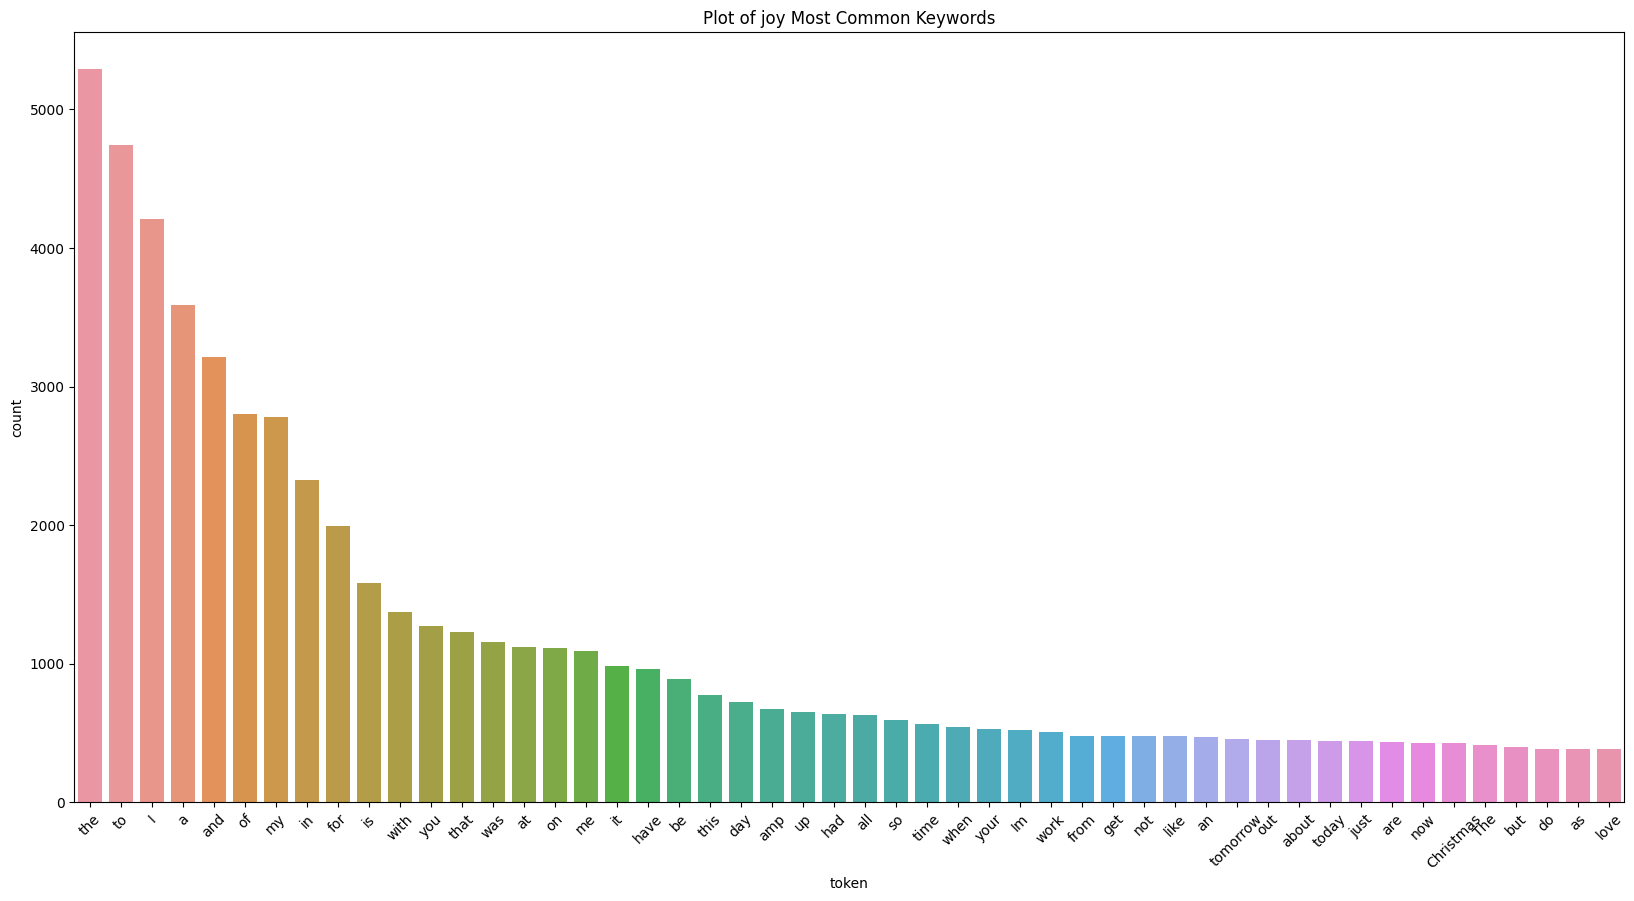

In [ ]:
plot_most_common_words(keyword_joy, "joy")

In [ ]:
surprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()
surprise_docx = ''.join(surprise_list)
keyword_surprise = extract_keywords(surprise_docx)

['maken', 'Tip', '2:', 'Stop', 'op', 'een', 'moment', 'dat', 'je', 'het', 'hele', 'project', 'wel', 'ziet', 'zitten', 'Nu', 'dus', '#derestkomtlaterwelEn', 'dan', 'krijg', 'je', 'ff', 'een', 'cadeautje', 'van', 'een', 'tweep', '#melike', '@1116am', 'Drummer', 'Boy', 'bij', 'op', 'verzoek', 'van', '@BiemOosterhof', '@frankcornet', ':', 'welke', 'uitvoering', 'van', 'wieHaha', 'of', 'course', 'I', 'come', 'home', 'to', 'a', 'different', 'house', 'leave', 'it', 'to', 'my', 'parents', 'to', 'redo', 'the', 'entire', 'downstairs', 'without', 'warning', '@JuliaLeader', 'I', 'reeeeeellllyyyyyyy', 'need', 'to', 'tell', 'you', 'something', 'but', 'guess', 'what', 'My', 'go', 'phone', 'is', 'fucked', 'up', '#gotohellmexicanphoneanother', 'ending', 'i', 'almost', 'pooped', 'my', 'pants', 'at', 'the', 'end', 'of', 'last', 'weeks', 'crazy', 'ending', '#dEcodEdpop', 'out', 'amp', 'roll', 'across', 'the', 'floor', 'alleen', 'nog', 'even', 'morgen', 'cadootjes', 'kopen', 'in', 'stadje', 'en', 'dan', 'h

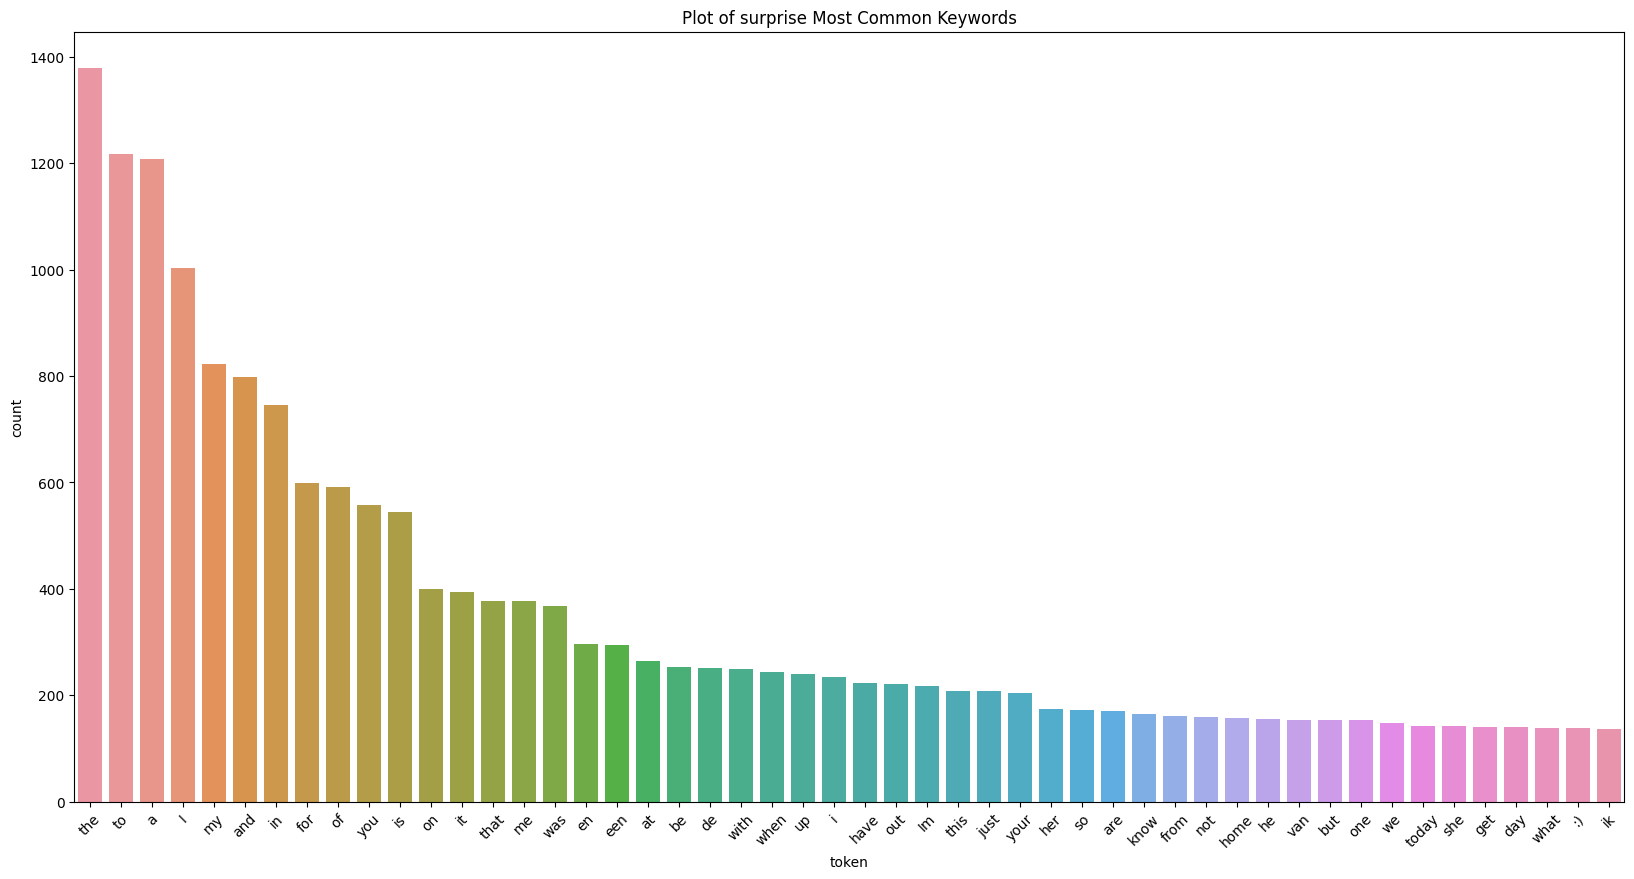

In [ ]:
plot_most_common_words(keyword_surprise, "surprise")

In [ ]:
from wordcloud import WordCloud

In [ ]:
def plot_wordcloud(docx):
  mywordcloud = WordCloud().generate(docx)
  plt.figure(figsize=(20,10))
  plt.imshow(mywordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

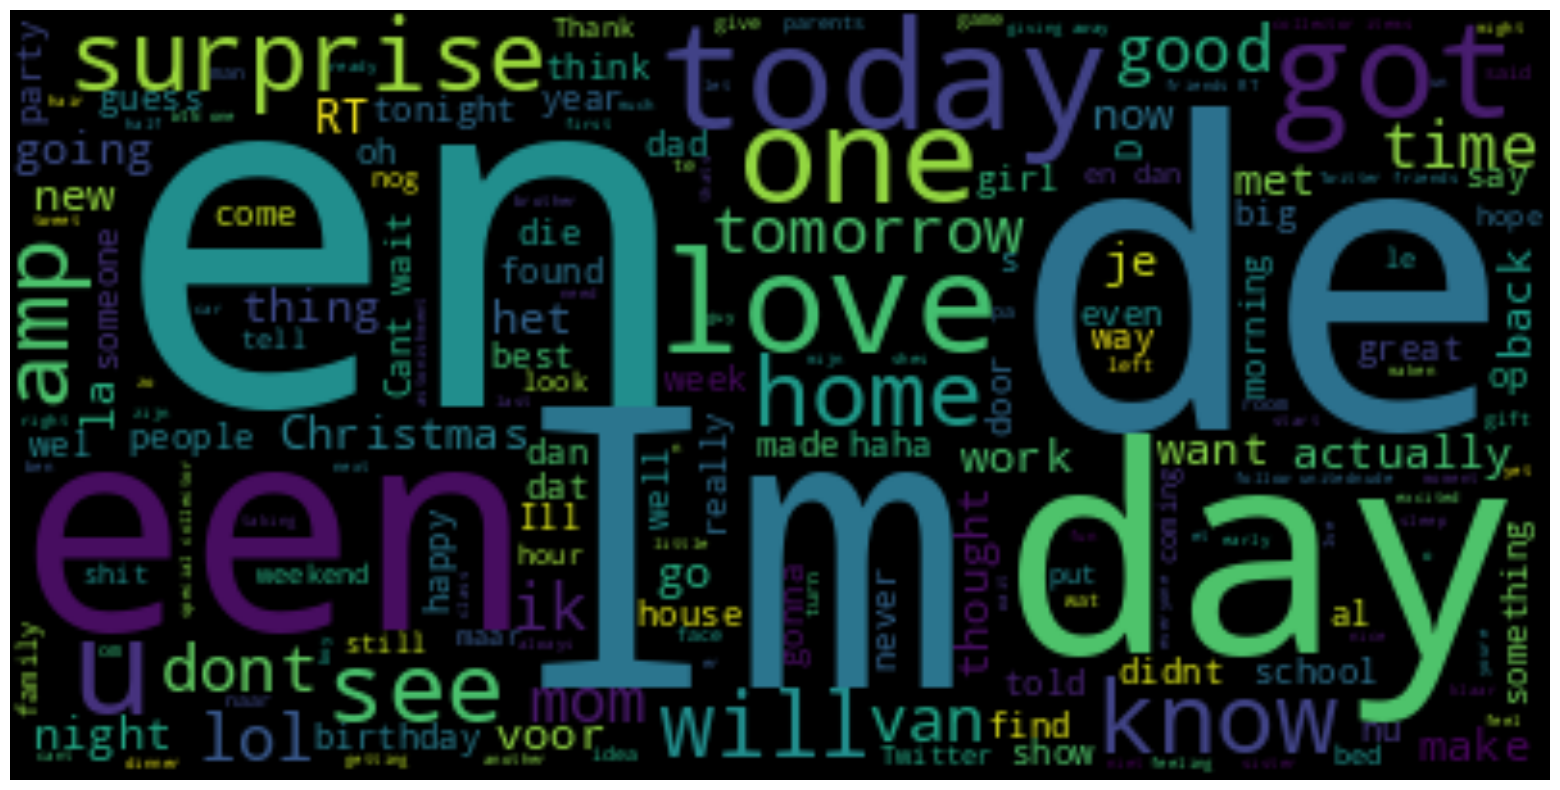

In [ ]:
plot_wordcloud(surprise_docx)

## Machine Learning
+ Naive Bayes
+ Logistic Regression
+ KNN 
+ Decision Tree


###### Compare with SparkNLP/NLU John Snows Lab

In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=c0d50c69f68903b5921024722670f0c07596800c0c6fda8ed7e32684817a43d0
  Stored in directory: /root/.cache/pip/wheels/d5/b2/a9/590d15767d34955f20a9a033e8db973b79cb5672d95790c0a9
Successfully built sklearn


In [ ]:
# Load ML packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# , plot_confusion_matrix


In [ ]:
# Split our Dataset
from sklearn.model_selection import train_test_split

In [ ]:
### Build features from out text

In [ ]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [ ]:
Xfeatures

0                                                    Why  
1           Sage Act upgrade on my to do list for tommorow
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3         Such an eye  The true hazel eyeand so brillia...
4        @Iluvmiasantos ugh babe hugggzzz for u   babe ...
                               ...                        
34787    @MichelGW have you gift Hope you like it Its h...
34788    The world didnt give it to meso the world MOST...
34789                              A man robbed me today  
34790       Youu call it JEALOUSY I call it of #Losing YOU
34791    I think about you baby and I dream about you a...
Name: Clean_Text, Length: 34792, dtype: object

In [ ]:
# Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [ ]:
# Get Features by Name
# cv.get_feature_names
# cv.get_feature_names_out

In [ ]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

# Build our model


###Naive Bayes

In [ ]:
nv_model = MultinomialNB()
nv_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
#Accuracy
# method 1

nv_model.score(X_test, y_test)

0.5637095228971067

In [ ]:
# Predictions
y_pred_for_nv = nv_model.predict(X_test)

In [ ]:
y_pred_for_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'joy', 'sadness'],
      dtype='<U8')

###KNN


In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

#accuracy
knn_model.score(X_test, y_test)

0.23538992144088905

In [ ]:
y_pred_for_knn = knn_model.predict(X_test)
y_pred_for_knn

array(['neutral', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

###Decison Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

#accuracy
dt_model.score(X_test, y_test)

0.5228013029315961

###Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

#accuracy
rf_model.score(X_test, y_test)

0.596761831768538

###Logistic Regression

In [ ]:
lr_model = LogisticRegression(max_iter=3000)
lr_model.fit(X_train, y_train)

#accuracy
lr_model.score(X_test, y_test)


0.6356581720636137

### Make a single prediction
+ Vectorized our Text
+ Applied our model



In [ ]:
sample_text = ["I love coding so much"]

In [ ]:
vect = cv.transform(sample_text).toarray()

In [ ]:
# Make Prediction
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [ ]:
# Check for the prediction probability
nv_model.predict_proba(vect)

array([[8.21487736e-03, 1.78742536e-04, 6.81135313e-02, 7.53662054e-01,
        2.91750978e-03, 1.36186716e-01, 3.07260114e-07, 3.07262618e-02]])

In [ ]:
# Get all the classes for our model
nv_model.classes_


array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [ ]:
np.max(nv_model.predict_proba(vect)) 

0.7536620536109229

In [ ]:
def predict_emotion(sample_text, model):
  myvect = cv.transform(sample_text).toarray()
  nv_model.predict(myvect)
  prediction = model.predict(myvect)
  pred_proba = model.predict_proba(myvect)
  pred_percentage_for_all = dict(zip(model.classes_, pred_proba[0]))
  print("Prediction: {}, Predcition Score: {}".format(prediction[0], np.max(pred_proba)))
  print(prediction[0])
  return pred_percentage_for_all


In [ ]:
predict_emotion(sample_text, nv_model)

Prediction: joy, Predcition Score: 0.7536620536109229
joy


{'anger': 0.008214877360637364,
 'disgust': 0.00017874253576347356,
 'fear': 0.0681135312857526,
 'joy': 0.7536620536109229,
 'neutral': 0.002917509777674074,
 'sadness': 0.1361867163477192,
 'shame': 3.0726011432282173e-07,
 'surprise': 0.030726261821417356}

In [ ]:
predict_emotion(["He hates running all day"], nv_model)

Prediction: joy, Predcition Score: 0.7994706477274417
joy


{'anger': 0.016699008003187018,
 'disgust': 3.6269034984559637e-05,
 'fear': 0.020212541477173857,
 'joy': 0.7994706477274417,
 'neutral': 0.0001585716176021452,
 'sadness': 0.151741176071485,
 'shame': 2.0023505583194777e-07,
 'surprise': 0.01168158583307294}

### Model Evaluation

In [ ]:
#Classification
print(classification_report(y_test, y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.65      0.48      0.55      1283
     disgust       0.43      0.02      0.04       292
        fear       0.74      0.57      0.65      1645
         joy       0.51      0.88      0.65      3311
     neutral       0.75      0.10      0.17       675
     sadness       0.54      0.53      0.54      2015
       shame       0.00      0.00      0.00        36
    surprise       0.59      0.24      0.34      1181

    accuracy                           0.56     10438
   macro avg       0.53      0.35      0.37     10438
weighted avg       0.59      0.56      0.53     10438



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Confusion
confusion_matrix(y_test, y_pred_for_nv)

array([[ 612,    0,   61,  396,    1,  203,    0,   10],
       [  32,    6,   27,  152,    0,   69,    0,    6],
       [  73,    2,  938,  380,    5,  172,    0,   75],
       [  56,    2,   99, 2903,    6,  178,    0,   67],
       [  27,    0,   17,  437,   65,  123,    0,    6],
       [  85,    0,   61,  752,    6, 1077,    0,   34],
       [   9,    0,    7,   12,    0,    8,    0,    0],
       [  52,    4,   52,  638,    4,  148,    0,  283]])

<Axes: >

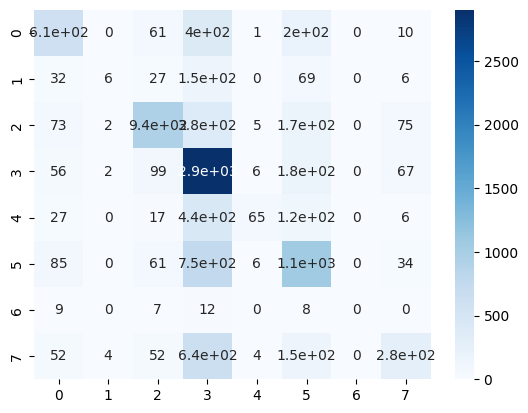

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_for_nv)

# Plot the heatmap
sns.heatmap(cm, annot=True, cmap='Blues')


In [ ]:
# LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Accuracy
lr_model.score(X_test, y_test)

0.635753975857444

In [ ]:
# Single Predict
predict_emotion(sample_text, lr_model)

Prediction: joy, Predcition Score: 0.5419294461875432
joy


{'anger': 0.0119293065350015,
 'disgust': 0.005615132579853705,
 'fear': 0.03635922537419716,
 'joy': 0.5419294461875432,
 'neutral': 0.20255192995588522,
 'sadness': 0.11980627028180037,
 'shame': 0.00047438157757739185,
 'surprise': 0.08133430750814145}

In [ ]:
predict_emotion(["I am ashamed to be you father!"], lr_model)

Prediction: shame, Predcition Score: 0.32117730027380803
shame


{'anger': 0.06469320841842022,
 'disgust': 0.02790268077828441,
 'fear': 0.04714261308881148,
 'joy': 0.13995130510831222,
 'neutral': 0.09775088030226456,
 'sadness': 0.2749485060757711,
 'shame': 0.32117730027380803,
 'surprise': 0.02643350595432807}

### Save model

In [ ]:
import joblib

In [ ]:
model_file_pkl = open("emotion_classifier_nv_model.pkl", "wb")
model_file_sav = open("emotion_classifier_nv_model.sav", "wb")
joblib.dump(nv_model, model_file_pkl)
joblib.dump(nv_model, model_file_sav)
model_file_pkl.close()
model_file_sav.close()